# Working with Road Network data

In [2]:
# Importing OSMNX library
import osmnx as ox

<div style='background:#B1F9E3; color:#000000' class= 'alert alert-box'>
OSMnx is a Python package to retrieve, model, analyze, and visualize street networks from OpenStreetMap. Users can download and model walkable, drivable, or bikeable urban networks with a single line of Python code, and then easily analyze and visualize them. You can just as easily download and work with amenities/points of interest, building footprints, elevation data, street bearings/orientations, and network routing.
    </div>

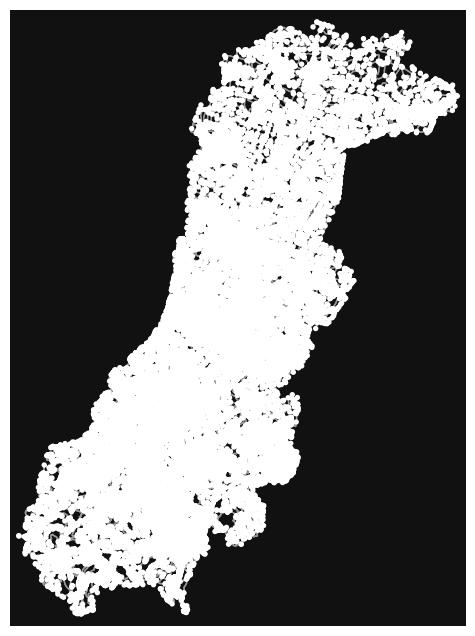

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
ox.plot_graph(ox.graph_from_place('Modena, Italy'))

<div style='background:#B1F9E3; color:#000000' class= 'alert alert-box'>
<li>Download street networks anywhere in the world with a single line of code
<li>Download other infrastructure types, place boundaries, building footprints, and points of interest
<li>Download by city name, polygon, bounding box, or point/address + network distance
<li>Download drivable, walkable, bikeable, or all street networks
<li>Download node elevations and calculate edge grades (inclines)
<li>Impute missing speeds and calculate graph edge travel times
<li>Simplify and correct the network’s topology to clean-up nodes and consolidate intersections
<li>Fast map-matching of points, routes, or trajectories to nearest graph edges or nodes
<li>Save networks to disk as shapefiles, GeoPackages, and GraphML
<li>Save/load street network to/from a local .osm xml file
<li>Conduct topological and spatial analyses to automatically calculate dozens of indicators
<li>Calculate and visualize street bearings and orientations
<li>Calculate and visualize shortest-path routes that minimize distance, travel time, elevation, etc
<li>Visualize street network as a static map or interactive leaflet web map
<li>Visualize travel distance and travel time with isoline and isochrone maps
<li>Plot figure-ground diagrams of street networks and/or building footprints

<div style='background:#B1F9E3; color:#000000' class= 'alert alert-box'>
    <b>refer:</b>
    <a href = 'https://geoffboeing.com/2016/11/osmnx-python-street-networks/'>
        https://geoffboeing.com/2016/11/osmnx-python-street-networks/
    </a>
</div>

In [ ]:
#  street network from bounding box

In [14]:
left_lon = 76.61372042094791
top_lat = 12.324337047834419
        
right_lon = 76.64681237158044
bottom_lat = 12.296624806895949

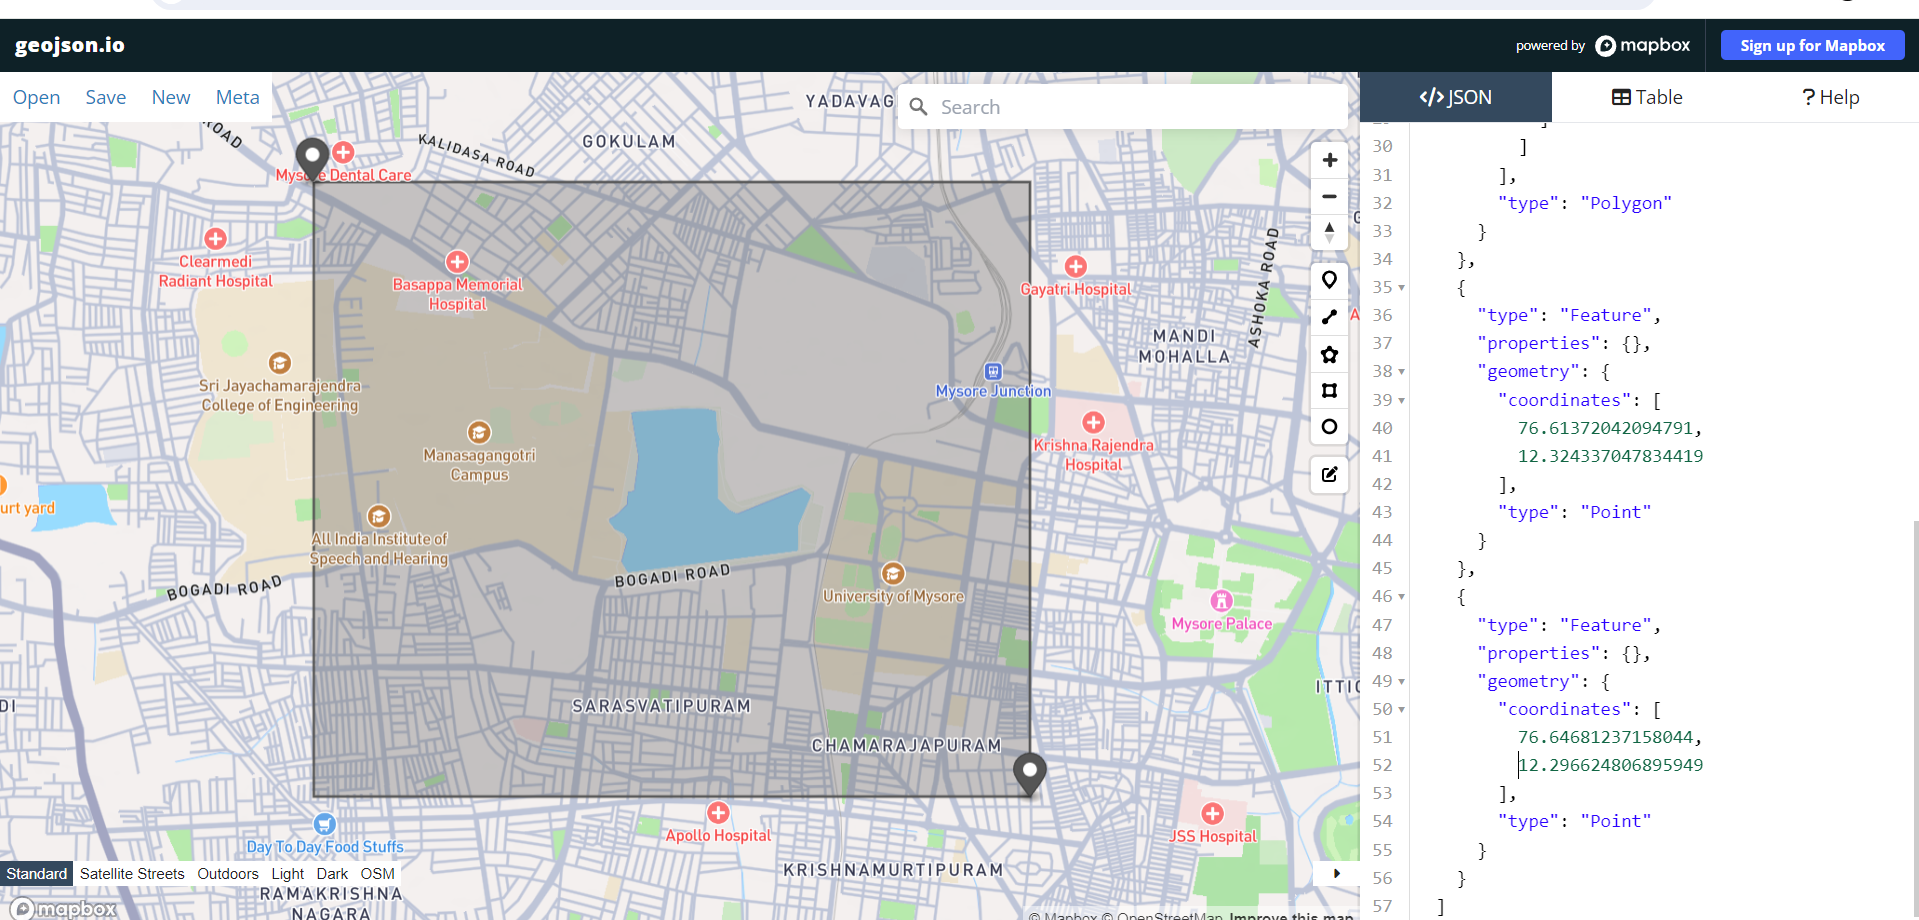

C:\Users\wwwsu\AppData\Local\Temp\ipykernel_11308\3746995866.py:1: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  aoi = ox.graph_from_bbox(top_lat,


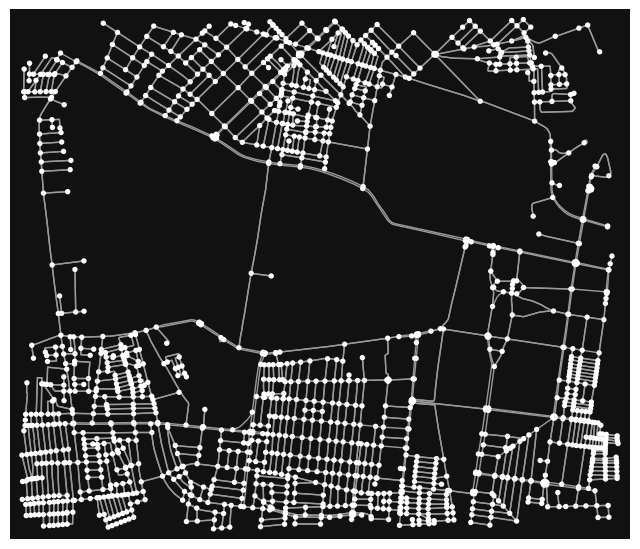

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [16]:
aoi = ox.graph_from_bbox(top_lat, 
                         bottom_lat, 
                         left_lon, 
                         right_lon, 
                         network_type='drive')
roads = ox.project_graph(aoi)
ox.plot_graph(roads)

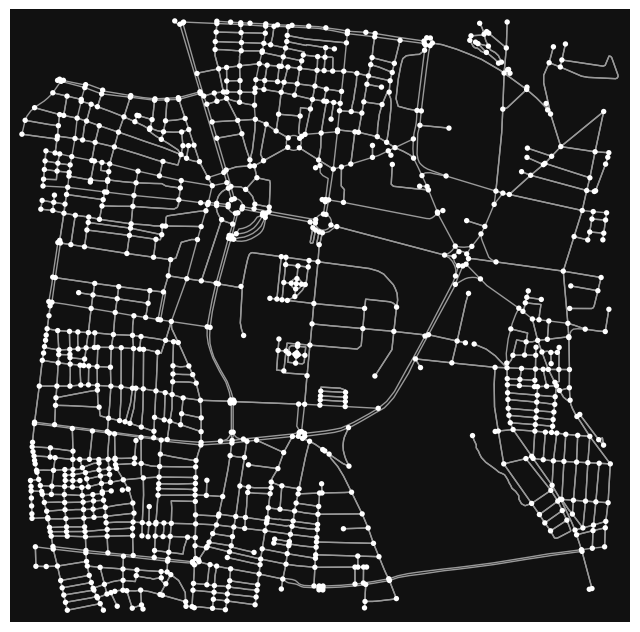

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [18]:
# street network from lat-long point
# This gets the street network within 1km (along the network) of a latitude-longitude point:
lat = 12.305417750442956
lon = 76.65560713821156
radius = 1000
mysore_palace = ox.graph_from_point((lat, lon), dist=radius, network_type='all')
ox.plot_graph(mysore_palace)

**street network from polygon**

Just load a shapefile with geopandas, then pass its shapely geometry to OSMnx.
    

In [19]:
import geopandas as gpd

In [20]:
url = "https://kgis.ksrsac.in/kgisdocuments/PDF_KML_SHP/Ward/Shapefiles/2606_Nanjanagud.zip"

In [21]:
gdf = gpd.read_file(url)

<Axes: >

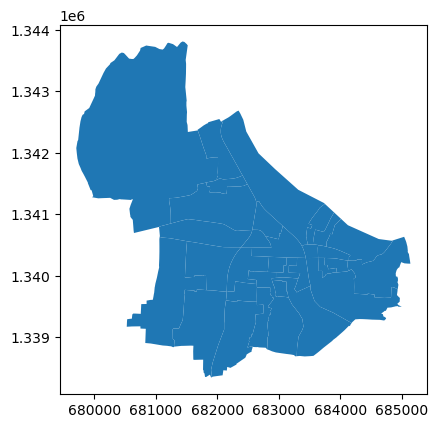

In [22]:
gdf.plot()

<Axes: >

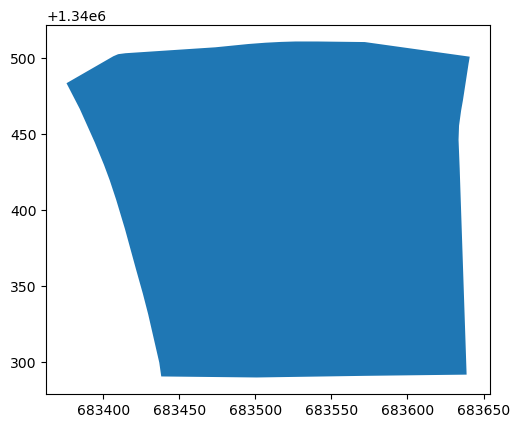

In [31]:
gdf[gdf['KGISWardNo'] == '9'].plot()

In [33]:
ward9 = gdf[gdf['KGISWardNo'] == '9'].to_crs('EPSG:4326')

<Axes: >

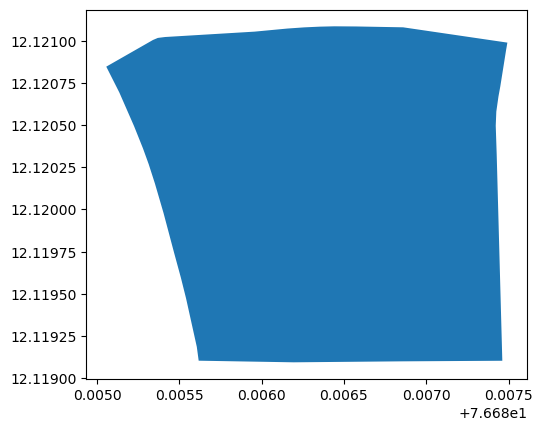

In [34]:
ward9.plot()

In [36]:
# Collecting Shapely geometry from geopandas frame
geom = ward9.loc[0, 'geometry']

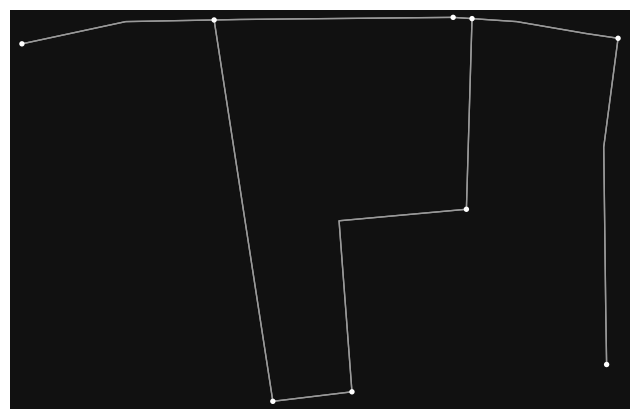

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [38]:
# Clipping road network of ward no 9
ward9_roads = ox.graph_from_polygon(geom, network_type='all')
ox.plot_graph(ward9_roads)

In [40]:
# Save street networks to disk
ox.save_graph_geopackage(ward9_roads, filepath="ward9.gpkg")
# Open geopackage in qgis

<div style='background:#B1F9E3; color:#000000' class= 'alert alert-box'>
    <b>Road network analysis</b>
     <b>refer:</b>
     <a href = 'https://github.com/gboeing/osmnx-examples/tree/main/notebooks'>
    https://github.com/gboeing/osmnx-examples/tree/main/notebooks
    </a>
</div>